# Pengenalan Pola

## Tugas 2: Klasifikasi Gambar

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas2_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Untuk kelancaran Anda, gunakan Python 3 dalam tugas ini. Selain itu, terdapat beberapa _packages_ yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scikit-learn
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/70**

### Deskripsi Dataset

Dataset hewan merupakan hasil "gambar tangan" beberapa orang melalui internet. Dataset untuk tugas ini diambil dari [The Quick Draw Dataset](https://github.com/googlecreativelab/quickdraw-dataset) yang dikumpulkan oleh Google. Dataset ini terdiri dari 50 juta gambar yang terdiri dari 345 kategori.

Untuk menyederhanakan tugas Anda, hanya subset dari dataset hewan yang diambil, yaitu sejumlah gambar dari 4 kategori hewan: **cat**, **crab**, **dog**, dan **dolphin**. Anda akan mengeksplorasi beberapa algoritma pembelajaran mesin yang dapat digunakan untuk mengklasifikasi gambar-gambar tersebut. Selain itu, Anda juga akan membuat beberapa visualisasi dari beberapa sampel gambar dalam dataset.

### Mengimpor Modul dan Dataset

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
X = np.load('datasets/quickdraw.npy')
y = np.load('datasets/quickdraw_labels.npy').astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
y

array(['cat', 'cat', 'cat', ..., 'dolphin', 'dolphin', 'dolphin'],
      dtype='<U7')

## 1. Eksplorasi Awal Data (15 poin)

### Soal 1.1 (4 poin)

Tampilkan 5 gambar sampel dari masing-masing kelas dalam `X_train` secara acak, lalu buatlah dalam bentuk grid berukuran 4 x 5!

In [4]:
labels = [
    'cat',
    'crab',
    'dog',
    'dolphin'
]

In [5]:
X_train = X_train.reshape(len(X_train),28,28)

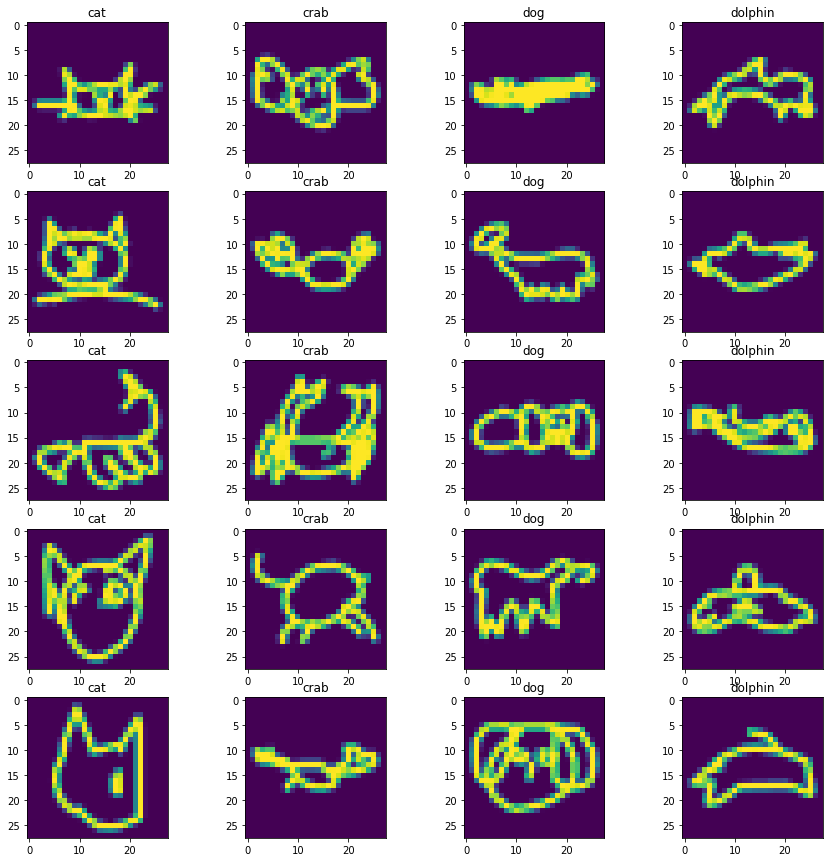

In [6]:
i=0
fig, ax = plt.subplots(5,4, figsize=(15,15))
for j in (['cat','crab', 'dog', 'dolphin']):
    for k in range(5):
        ax[k,i].set_title(j)
        ax[k,i].imshow(X_train[y_train==j][k])
    i+=1

### Soal 1.2.a (4 poin)

Gambarkan histogram nilai pixel di posisi (0,0), i.e. pojok kiri atas, dan (15,15) dari data `X_train` dalam dua plot yang berbeda. Batasi sumbu x untuk bernilai $x \in [0, 1]$. Bagi nilai tiap pixel dengan 255 terlebih dahulu.

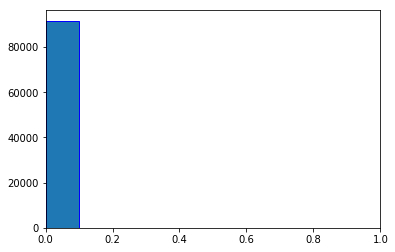

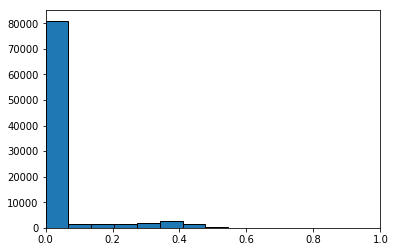

In [7]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)
X_train = X_train/255
X_test = X_test/255

plt.hist(X_train[:,0],histtype='bar', ec='blue')
plt.xlim(0,1)
plt.show() 

plt.hist(X_train[:,225],histtype='bar', ec='black')
plt.xlim(0,1)
plt.show() 

### Soal 1.2.b (2 poin)

Apa yang dapat Anda simpulkan dari kedua histogram tersebut?

*Dari kedua histogram tersebut, dapat diketahui bahwa pada posisi (0,0), nilai semua pixelnya = 0, sedangkan pada posisi (15,15), tidak semua nilai pixelnya = 0. Hal itu berarti bahwa pada posisi (0,0) tidak berpengaruh pada gambar,sedangkan pada posisi(15,15) masih mempengaruhi gambar.*

### Soal 1.3 (2 poin)

Berapa jumlah data untuk masing-masing kelas dalam data latih dan data uji?

In [8]:
print("Data Latih :",pd.value_counts(y_train))
print("Data Uji :",pd.value_counts(y_test))

Data Latih : dog        26468
crab       22269
cat        21582
dolphin    21362
dtype: int64
Data Uji : dog        11571
crab        9463
cat         9218
dolphin     9041
dtype: int64


## 2. Klasifikasi dengan Naive Bayes (25 poin)

### Soal 2.1.a (1 poin)

Ubah nilai pixel dalam `X_train` dan `X_test` dengan membaginya dengan 255.

In [9]:
X_train/=255
X_test/=255

### Soal 2.1.b (2 poin)

Ubah nilai `y_train` dan `y_test` menggunakan `LabelEncoder` agar menjadi $\in \{1,2,3,4\}$.

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)

### Soal 2.2 (5 poin)

Dengan modul `GaussianNB`, klasifikasikan `X_test` dari `X_train`, laporkan akurasinya dan gambarkan *heatmap* dari *confusion matrix*-nya! Jangan lupa untuk memberikan label untuk masing-masing sumbunya dan menganotasi tiap kotak pada *heatmap*!

Pada proses pelatihan model (`clf.fit()`), tambahkan `%timeit -n1` pada baris yang sama sehingga menjadi `%timeit -n1 clf.fit()`. Ini akan menunjukkan waktu yang dibutuhkan untuk melatih model tersebut.

The slowest run took 4.01 times longer than the fastest. This could mean that an intermediate result is being cached.
2.98 s ± 2.16 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Akurasi : 45.548%


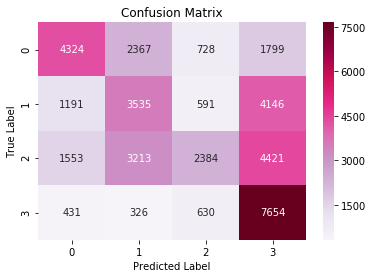

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
model = %timeit -n1 clf.fit(X_train,y_train)

predict = clf.predict(X_test)
print("Akurasi : %.3f" % (accuracy_score(y_test, predict)*100) + "%")

cm = confusion_matrix(y_test,predict)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 2.3 (3 poin)

Terapkan PCA pada `X_train`. Gunakan semua dimensi yang dihasilkan dari metode PCA, lalu plot persentase kumulatif variansi yang dijelaskan untuk setiap penambahan *principal component*. Berikan garis putus-putus horizontal untuk menandai saat persentase kumulatifnya mencapai 90%. Catat waktu yang dibutuhkan untuk proses transformasi `X_train` dengan PCA dengan `%timeit -n1`.

*Petunjuk: Gunakan `.fit()` dari modul `PCA` dan baca dokumentasinya untuk tahu lebih lengkap cara pemakaiannya!*

2.65 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
original shape:    (91681, 784)
transformed shape: (91681, 500)


Text(0, 0.5, 'cumulative explained variance')

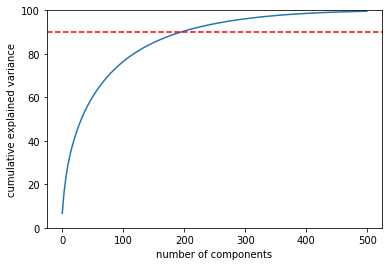

In [12]:
from sklearn.decomposition import PCA

#PCA
pca = PCA(n_components=500)
pca.fit(X_train, y_train)
X_pca = pca.transform(X_train)
%timeit -n1 pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.axhline(90, linestyle='--', color='r')
plt.ylim(0,100)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Soal 2.4.a (5 poin)

Dari soal sebelumnya, Anda mungkin akan memperhatikan bahwa 90% variansi dapat dijelaskan dengan 200 komponen prinsipil. Transformasikan data dengan PCA dan ambil 200 komponen saja kali ini.

Latih kembali model Naive Bayes Anda dengan kode seperti yang telah Anda buat di soal 2.2 dan prediksi label `X_test` yang telah diubah dengan PCA! Apakah Anda menemukan perbedaan waktu dan akurasi dengan soal 2.2?

The slowest run took 6.29 times longer than the fastest. This could mean that an intermediate result is being cached.
3.96 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Akurasi : 43.428%


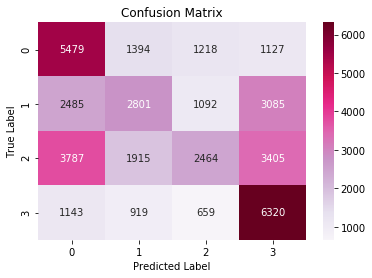

In [13]:
X_train_pca = pca.transform(X_train[0:200])
X_test_pca = pca.transform(X_test)

clf = GaussianNB()
model = %timeit -n1 clf.fit(X_train_pca,y_train[0:200])

predict = clf.predict(X_test_pca)
print("Akurasi : %.3f" % (accuracy_score(y_test, predict)*100) + "%")

cm = confusion_matrix(y_test,predict)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 2.4.b (2 poin)

Apa yang menyebabkan perbedaan waktu dan akurasi dari model Naive Bayes sebelum dan setelah menggunakan PCA?

*Perbedaan waktu disebabkan karena perbedaan dimensi antara sebelum dan setelah menggunakan PCA, serta untuk akurasi disebabkan karena perbedaan jumlah sample untuk melatih datanya*

### Soal 2.5 (2 poin)

Lakukan PCA kembali untuk menghasilkan 2 komponen prinsipil saja dari `X_train`. Lalu, visualisasikan hasil transformasi tersebut dalam *scatter plot* yang dibedakan warnanya berdasarkan kelas dalam `y_train`!

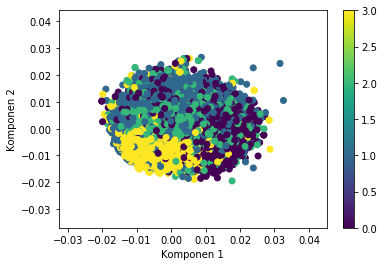

In [14]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],c = y_train.reshape(X_train_pca[: , 0].shape))
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.colorbar();

### Soal 2.6 (5 poin)

Berikan kesimpulan sementara Anda dari eksplorasi dengan PCA dan Naive Bayes ini.

*Dari hasil eksplorasi dengan PCA menunjukkan bahwa menggunakan PCA dapat mengurangi waktu komputasi, namun perlu mempertimbangkan nilai komponen prinsipilnya, karena harus memilih nilai yang dapat mewakili keseluruhan data*

## 3. Model Linear (30 poin)

### Soal 3.1.a (3 poin)

Klasifikasikan data `X_test` dengan melatih model regresi logistik dari `X_train`. Gunakan parameter bawaan dari pustakanya. Laporkan akurasi dan *confusion matrix*-nya.

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

9.26 s ± 272 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Akurasi : 64.584%


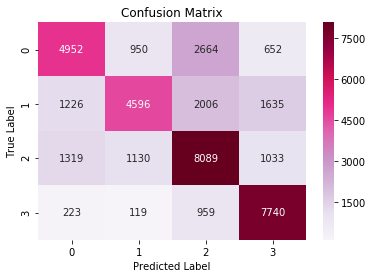

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
model = %timeit -n1 clf.fit(X_train,y_train)

predict = clf.predict(X_test)
print("Akurasi : %.3f" % (accuracy_score(y_test, predict)*100) + "%")

cm = confusion_matrix(y_test,predict)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 3.1.b (2 poin)

Gambarkan nilai dari koefisien yang membentuk masing-masing kelas dalam bentuk line plot. Dengan demikian, seharusnya Anda akan punya 4 line plots.

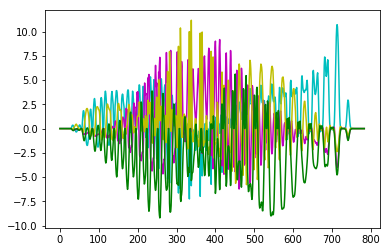

In [16]:
plt.plot(clf.coef_[0], color = 'c')
plt.plot(clf.coef_[1], color = 'm')
plt.plot(clf.coef_[2], color = 'y')
plt.plot(clf.coef_[3], color = 'g')

### Soal 3.2.a (2 poin)

Klasifikasikan kembali data, tapi kali ini ubah nilai parameter `C` menjadi 0.01. Laporkan kembali akurasi dan *confusion matrix*-nya.

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

4.57 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Akurasi : 29.448%


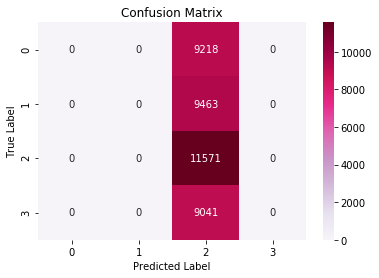

In [17]:
clf = LogisticRegression(C=0.01)
model = %timeit -n1 clf.fit(X_train,y_train)

predict = clf.predict(X_test)
print("Akurasi : %.3f" % (accuracy_score(y_test, predict)*100) + "%")

cm = confusion_matrix(y_test,predict)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 3.2.b (3 poin)

Gambarkan kembali koefisien dari modelnya seperti pada soal 3.1.b. Apa yang dapat Anda perhatikan?

*Petunjuk: Perhatikan skala gambarnya!*

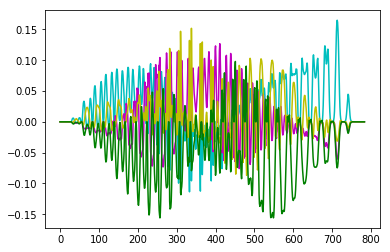

In [18]:
plt.plot(clf.coef_[0], color = 'c')
plt.plot(clf.coef_[1], color = 'm')
plt.plot(clf.coef_[2], color = 'y')
plt.plot(clf.coef_[3], color = 'g')

*Dari gambar tersebut diketahui bahwa nilai y berubah menjadi lebih kecil 50x lipat dari sebelumnya*

### Soal 3.3 (5 poin)

Terapkan PCA pada data dan ambil 200 komponen prinsipil pertama. Klasifikasikan kembali dengan model regresi logistik. Laporkan akurasi dan gambarkan *heatmap* dari *confusion matrix*-nya. Apakah hasil klasifikasinya menjadi lebih baik? Mengapa?

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

The slowest run took 44.87 times longer than the fastest. This could mean that an intermediate result is being cached.
30.4 ms ± 60 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Akurasi : 24.083%


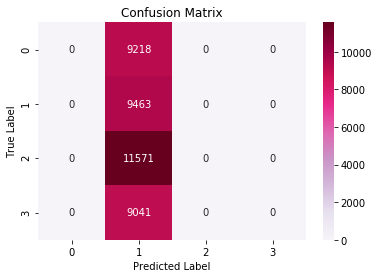

In [21]:
pca = PCA(n_components=200)
pca.fit(X_train,y_train)
X_train_pca = pca.transform(X_train[0:200])
X_test_pca = pca.transform(X_test)

clf = LogisticRegression(C=0.01)
model = %timeit -n1 clf.fit(X_train_pca,y_train[0:200])

predict = clf.predict(X_test_pca)
print("Akurasi : %.3f" % (accuracy_score(y_test, predict)*100) + "%")

cm = confusion_matrix(y_test,predict)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

*Tidak, karena 200 komponen prinsipil pertama, tidak mewakili keseluruhan data*

### Soal 3.4.a (4 poin)

Kita akan mengevaluasi lebih jauh mengenai efek regularisasi. Lakukan klasifikasi dengan regresi logistik pada `X_train_pca` dan `X_test_pca` dengan nilai $C = \{10^x|-2 \leq x \leq 6, x \in \mathbb{Z}\}$. Plot hasilnya dengan menggunakan sumbu x berbasis $\log_{10} C$.

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Akurasi : 69.789%


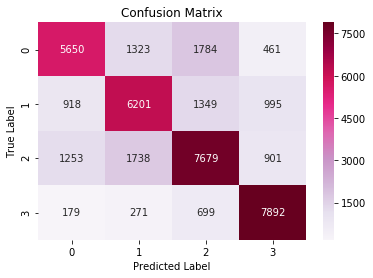

In [24]:
clf = LogisticRegression(C=1000)
X_train_pca = pca.transform(X_train)
clf.fit(X_train_pca,y_train)
predict = clf.predict(X_test_pca)
print("Akurasi : %.3f" % (accuracy_score(y_test, predict)*100) + "%")

cm = confusion_matrix(y_test,predict)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (39293,)

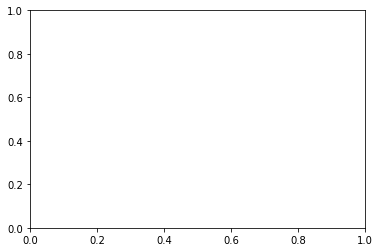

In [29]:
import math

plt.plot(math.log(3),predict)
plt.axhline(90, linestyle='--', color='r')

### Soal 3.4.b (3 poin)

Buatlah *pipeline* dengan menggunakan transformasi Gaussian seperti yang dicontohkan di [sini](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Gaussian-basis-functions). Gunakan nilai fitur [2, 4, 8, 16, 32]. Gambarkan plotnya seperti pada soal 3.4.a. Apa yang dapat Anda perhatikan?

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

In [35]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(GaussianFeatures(30),
                      LogisticRegression())
model.fit(X_train, y_train)

plt.scatter(X_train, y_train)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

MemoryError: 

### Soal 3.4.c (5 poin)

Apa yang menjadi masalah pada hasil soal 3.4.a dan 3.4.b? Apa yang mungkin dapat dilakukan untuk memperbaiki akurasi dari modelnya? Lakukan eksplorasi tambahan jika diperlukan!

*Jawaban Anda di sini*

### Soal 3.5 (3 poin)

Berikan kesimpulan Anda dari hasil eksplorasi Anda dalam tugas ini.

*Dari tugas ini, dapat diketahui bahwa PCA dapat membuat komputasi lebih cepat, namun akurasinya belum tentu lebih baik dibandingkan Regresi Logistik, karena komponen prinsipilnya harus tepat, agar akurasinya baik. Dan untuk tugas ini, nilai akurasi jauh lebih baik menggunakan Regresi Logistik dibandingkan menggunakan Gaussian*